In [ ]:
# scikit-learn comes with several test datasets.
# importing the hand written digit dataset
from sklearn import datasets

# digit contain the dataset
digits = datasets.load_digits()

# dir function use to display the attributes of the dataset
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [ ]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [ ]:
#  look in more details at some of these attributes.
print(type(digits.images))
print(type(digits.target))

#digits.image is an array with 3 dimensions.
# The first dimension indexes images, (have 1797 images). The next two dimensions correspond to the x and y coordinates of the pixels in each image. Each image has 8x8 = 64 pixels
digits.images.shape

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


(1797, 8, 8)

In [ ]:
# outputting the picture value as a series of numbers
# Each slot in the array corresponds to a pixel, and the value in the slot is the amount of black in the pixel.
print (digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


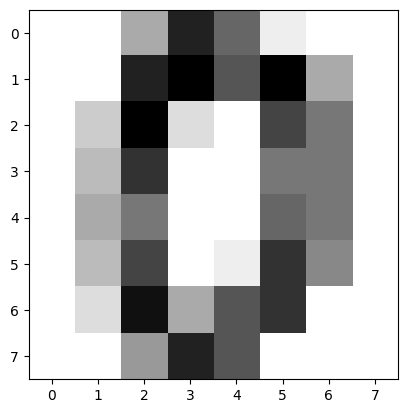

In [ ]:
#  display the image - digits.image[0] represent 0
import matplotlib.pyplot as plt
plt.imshow(digits.images[0],cmap='binary')
plt.show()

In [ ]:
# NOTE :
# The image is low resolution.
# The original digits were of much higher resolution, and the resolution has been decreased when creating the dataset for scikit-learn
# to make it easier and faster to train a machine learning algorithm to recognize these digits.


# defining the function plot_multi

def plot_multipleImage(i):
    # Plots 16 digits, starting with digit i
    nplots = 16
    fig = plt.figure(figsize=(15, 15))
    for j in range(nplots):
        plt.subplot(4, 4, j+1)
        plt.imshow(digits.images[i+j], cmap='binary')
        plt.title(digits.target[i+j])
        plt.axis('off')
    # printing the each digits in the dataset.
    plt.show()



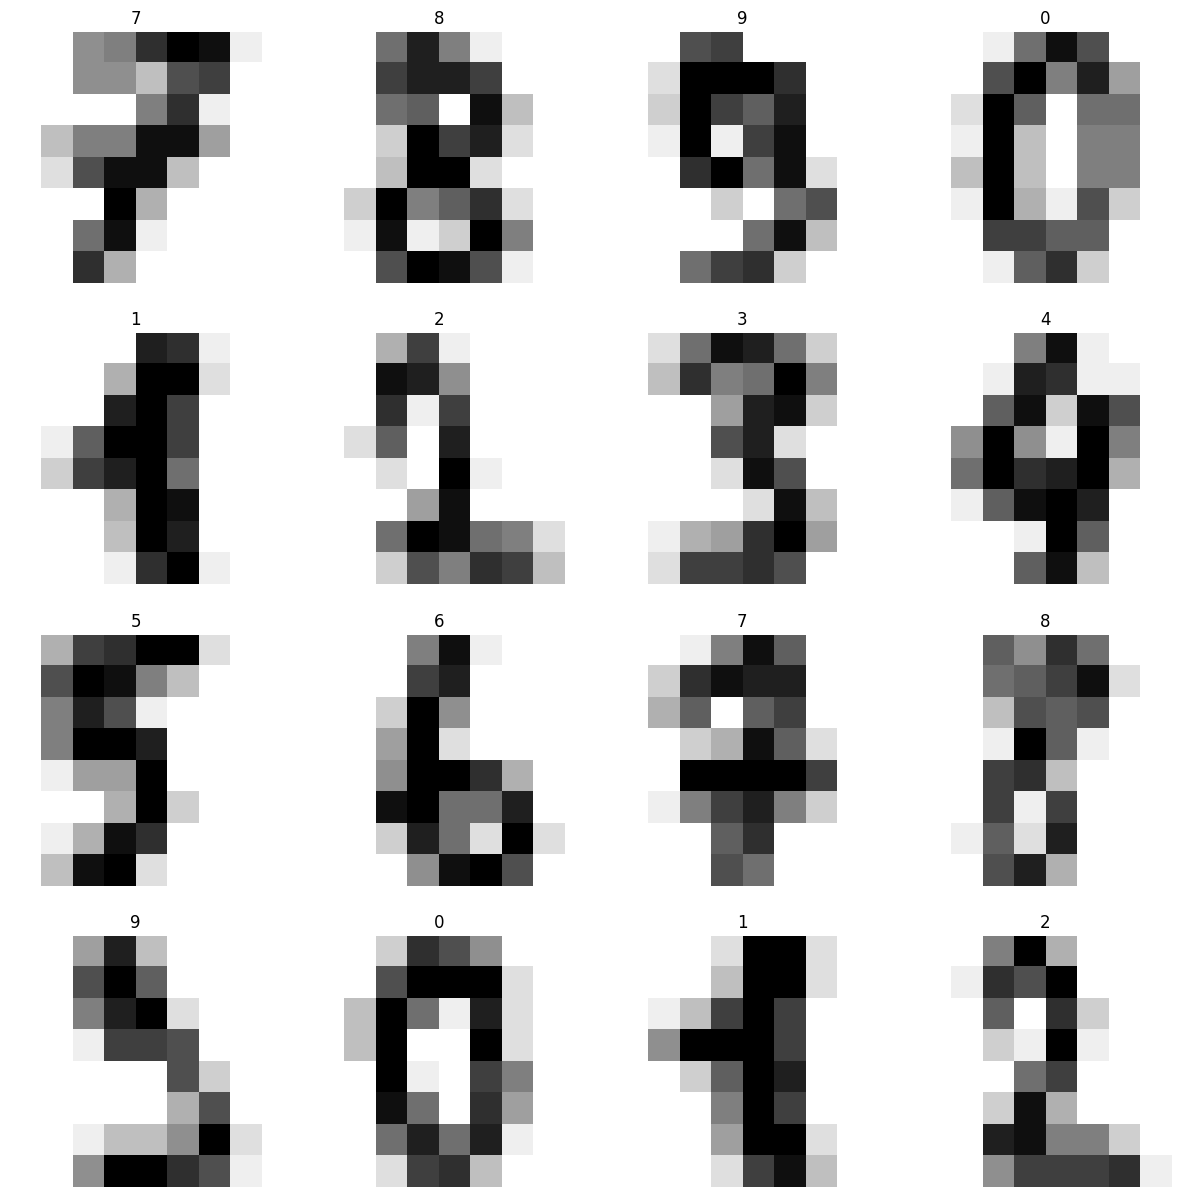

In [ ]:
# give the number as you want to start from
plot_multipleImage(7)

In [ ]:
# converting the 2 dimensional array to one dimensional array
# The input layer expects a one-dimensional array, whereas the image datasets are two-dimensional. As a result, need to flatten all images:
y = digits.target
x = digits.images.reshape((len(digits.images), -1))

# gives the  shape of the data
print(x.shape)
print(y.shape)

(1797, 64)
(1797,)


In [ ]:
#We now have 1797 flattened images.
# The two dimensions of our 8x8 images have been collapsed into a single dimension by writing the rows of 8 pixels as they come, one after the other.
x[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
# Data split for training and testing

# Very first 1000 photographs and
# labels will be used in training.
x_train = x[:1000]
y_train = y[:1000]

# The leftover dataset will be utilised to
# test the network's performance later on.
x_test = x[1000:]
y_test = y[1000:]

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1000, 64)
(1000,)
(797, 64)
(797,)


## Training Neural network use Multi-Layer Perceptron classifier

In [ ]:
# importing the MLP classifier from sklearn
from sklearn.neural_network import MLPClassifier

# calling the MLP classifier with specific parameters
# here used one hidden layers with 15 neurons in the NN
# 'logistic' activation function refers to the logistic sigmoid function, which outputs values between 0 and 1.
# alpha - L2 regularization term, also known as weight decay. helps prevent overfitting by penalizing large weights
# solver - optimization algorithm. sgd - Stochastic Gradient Descent.
# tol - tolerance for optimization. Training will stop if the improvement in the loss function is less than 1e-4 for 10 consecutive iterations.
# random state to ensure reproducibility of results.
#  initial learning rate for weight updates.determines the step size during gradient descent updates
# verbose - Prints detailed progress during training, including loss values at each iteration.
mlp = MLPClassifier(hidden_layer_sizes=(15,),
                    activation='logistic',
                    alpha=1e-4, solver='sgd',
                    tol=1e-4, random_state=1,
                    learning_rate_init=.1,
                    verbose=True)

In [ ]:
# train MLP Model on training data

mlp.fit(x_train, y_train)

Iteration 1, loss = 2.22958289
Iteration 2, loss = 1.91207743
Iteration 3, loss = 1.62507727
Iteration 4, loss = 1.32649842
Iteration 5, loss = 1.06100535
Iteration 6, loss = 0.83995513
Iteration 7, loss = 0.67806075
Iteration 8, loss = 0.55175832
Iteration 9, loss = 0.45840445
Iteration 10, loss = 0.39149735
Iteration 11, loss = 0.33676351
Iteration 12, loss = 0.29059880
Iteration 13, loss = 0.25437208
Iteration 14, loss = 0.22838372
Iteration 15, loss = 0.20200554
Iteration 16, loss = 0.18186565
Iteration 17, loss = 0.16461183
Iteration 18, loss = 0.14990228
Iteration 19, loss = 0.13892154
Iteration 20, loss = 0.12833784
Iteration 21, loss = 0.12138920
Iteration 22, loss = 0.11407971
Iteration 23, loss = 0.10677664
Iteration 24, loss = 0.10037149
Iteration 25, loss = 0.09593187
Iteration 26, loss = 0.09250135
Iteration 27, loss = 0.08676698
Iteration 28, loss = 0.08356043
Iteration 29, loss = 0.08209789
Iteration 30, loss = 0.07649168
Iteration 31, loss = 0.07410898
Iteration 32, los

MLPClassifier(activation='logistic', hidden_layer_sizes=(15,),
              learning_rate_init=0.1, random_state=1, solver='sgd',
              verbose=True)

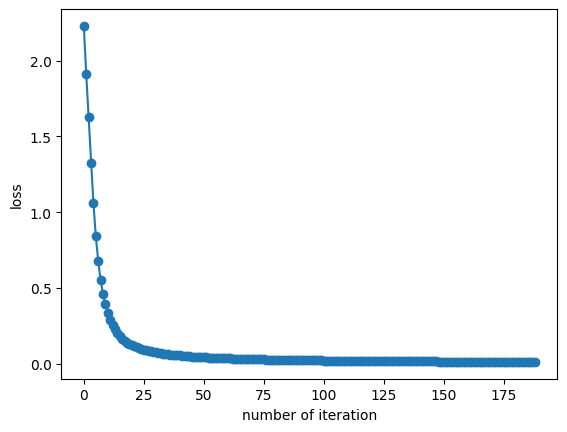

In [ ]:
fig, axes = plt.subplots(1, 1)
axes.plot(mlp.loss_curve_, 'o-')
axes.set_xlabel("number of iteration")
axes.set_ylabel("loss")
plt.show()

In [ ]:
# model evaluate

predictions = mlp.predict(x_test)
print(predictions.shape)
predictions[:100] # # we just look at the 1st 100 examples in the test sample

(797,)


array([1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 3, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 5, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0,
       9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 7, 1, 2, 0, 1, 2, 6, 3, 3,
       7, 3, 3, 4, 6, 6, 6, 9, 9, 1, 5, 0])

In [ ]:
y_test[:100]
# most (if not all) predictions match the true labels.

array([1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 9, 5, 5, 6, 5, 0,
       9, 8, 9, 8, 4, 1, 7, 7, 3, 5, 1, 0, 0, 7, 8, 2, 0, 1, 2, 6, 3, 3,
       7, 3, 3, 4, 6, 6, 6, 4, 9, 1, 5, 0])

In [ ]:
# importing the accuracy_score from the sklearn
from sklearn.metrics import accuracy_score

# calculating the accuracy with y_test and predictions
accuracy_score(y_test, predictions)

0.9146800501882058

In [ ]:
# This number is the probability for the digits in the test sample to be classified in the right category.
# meaning that we get 91.4% of the digits right, and 8.6% wrong.

In [ ]:
from sklearn import metrics
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predictions)}\n")

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       0.96      0.95      0.96        79
           1       0.88      0.89      0.88        80
           2       0.93      0.91      0.92        77
           3       0.86      0.82      0.84        79
           4       0.98      0.95      0.96        83
           5       0.89      0.96      0.92        82
           6       0.98      0.99      0.98        80
           7       0.99      0.95      0.97        80
           8       0.90      0.83      0.86        76
           9       0.81      0.89      0.85        81

    accuracy                           0.91       797
   macro avg       0.92      0.91      0.91       797
weighted avg       0.92      0.91      0.91       797




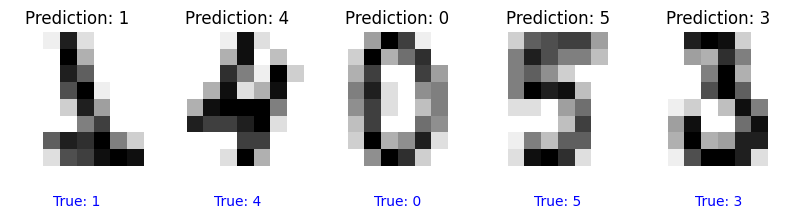

In [ ]:
# showing the predicted value for test data images
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, prediction, true_value in zip(axes, x_test, predictions, y_test):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')
    ax.text(0.5, -0.3, f'True: {true_value}', transform=ax.transAxes,
            fontsize=10, ha='center', color='blue')

## Using SVM

In [ ]:
# Import datasets, classifiers and performance metrics
from sklearn import  svm, metrics


In [ ]:
# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)



(1000, 64)
(1000,)
(797, 64)
(797,)


In [ ]:
# Learn the digits on the train subset
clf.fit(x_train, y_train)

SVC(gamma=0.001)

In [ ]:
# Predict the value of the digit on the test subset
predictions_SVM = clf.predict(x_test)

In [ ]:
# check predicted values with actual values

print(predictions_SVM.shape)
print(y_test.shape)

print(predictions_SVM[:50])
print(y_test[:50])

(797,)
(797,)
[1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 4 9 0 8 9 8 0 1 2 3 4 5 6 7
 8 9 0 1 2 3 4 5 6 7 8 9 0]
[1 4 0 5 3 6 9 6 1 7 5 4 4 7 2 8 2 2 5 7 9 5 4 4 9 0 8 9 8 0 1 2 3 4 5 6 7
 8 9 0 1 2 3 4 5 6 7 8 9 0]


In [ ]:
# check the accuracy
# calculating the accuracy with y_test and predictions_SVM
print(accuracy_score(y_test, predictions_SVM))
print("======================================")

print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predictions_SVM)}\n")

0.9698870765370138
Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        79
           1       0.99      0.96      0.97        80
           2       0.99      0.99      0.99        77
           3       0.97      0.86      0.91        79
           4       0.99      0.95      0.97        83
           5       0.95      0.99      0.97        82
           6       0.99      0.99      0.99        80
           7       0.95      1.00      0.98        80
           8       0.94      1.00      0.97        76
           9       0.94      0.98      0.96        81

    accuracy                           0.97       797
   macro avg       0.97      0.97      0.97       797
weighted avg       0.97      0.97      0.97       797




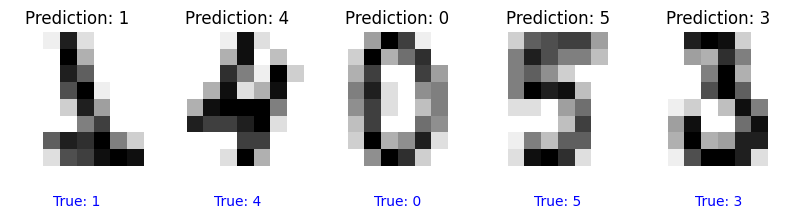

In [ ]:
# showing the predicted value for test data images
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, prediction, true_value in zip(axes, x_test, predictions_SVM, y_test):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')
    ax.text(0.5, -0.3, f'True: {true_value}', transform=ax.transAxes,
            fontsize=10, ha='center', color='blue')

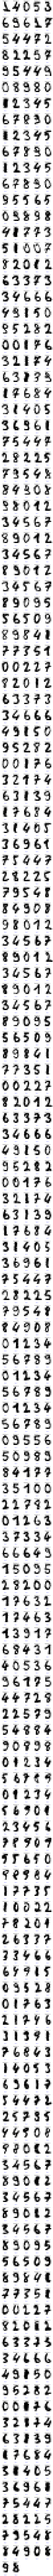

In [ ]:
import matplotlib.pyplot as plt
import math

# Number of images per row
images_per_row = 5

# Calculate the number of rows needed
num_images = len(x_test)
num_rows = math.ceil(num_images / images_per_row)

# Create subplots with calculated rows and fixed columns (5)
fig, axes = plt.subplots(nrows=num_rows, ncols=images_per_row, figsize=(10, 3 * num_rows))

# Flatten axes array for easy iteration if there are multiple rows
axes = axes.flatten()

# Loop through the images and display them
for i, (ax, image, prediction, true_value) in enumerate(zip(axes, x_test, predictions_SVM, y_test)):
    ax.set_axis_off()
    image = image.reshape(8, 8)  # Reshape image for display
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')

    # Display the predicted value at the top
    ax.set_title(f'Prediction: {prediction}')

    # Display the true value at the bottom
    ax.text(0.5, -0.3, f'True: {true_value}', transform=ax.transAxes,
            fontsize=10, ha='center', color='blue')

# Turn off any unused axes
for ax in axes[num_images:]:
    ax.set_axis_off()

plt.tight_layout()
plt.show()
